In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read and standarize the dataset
df = pd.read_csv('data/selected_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns.values)
df['target'] = y

# Divide dataframe depending on target
df_correct = df.loc[df['target'] == 1]
df_incorrect = df.loc[df['target'] == 0]

# Print each target shape
print('Target 1 shape: ' + str(df_correct.shape))
print('Target 0 shape: ' + str(df_incorrect.shape))

Target 1 shape: (5055, 39)
Target 0 shape: (4959, 39)


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
scores = cross_val_score(clf, df.iloc[:,:-1], df.iloc[:,-1], cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.05)


In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df_correct = shuffle(df_correct).reset_index(drop=True)
df_train, df_test = train_test_split(df_correct, test_size=0.2, random_state=0)
df_test = df_test.append(df_incorrect).reset_index(drop=True)

X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# Hotelling T2

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9).fit(X_train)
len(pca.components_)

13

In [22]:
transformed = pca.transform(X_test)

import plotly.express as px
fig = px.scatter(x=transformed[:,0], y=transformed[:,1], color=y_test)
fig.show()

In [23]:
from models.hotelling.t2 import hotelling_tsquared

t2 = hotelling_tsquared(transformed)

import plotly.express as px
fig = px.scatter(y=t2, color=y_test)
fig.show()

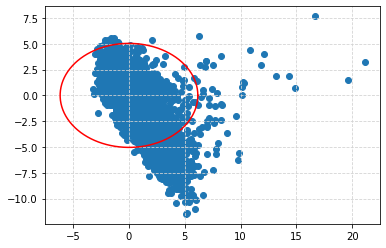

In [13]:
import matplotlib.pyplot as plt
import scipy, random

dataProject = pca.transform(X_test)

#Calculate ellipse bounds and plot with scores
theta = np.concatenate((np.linspace(-np.pi, np.pi, 50), np.linspace(np.pi, -np.pi, 50)))
circle = np.array((np.cos(theta), np.sin(theta)))
sigma = np.cov(np.array((dataProject[:, 0], dataProject[:, 1])))
ed = np.sqrt(scipy.stats.chi2.ppf(0.95, 2))
ell = np.transpose(circle).dot(np.linalg.cholesky(sigma) * ed)
a, b = np.max(ell[: ,0]), np.max(ell[: ,1]) #95% ellipse bounds
t = np.linspace(0, 2 * np.pi, 100)

plt.scatter(dataProject[:, 0], dataProject[:, 1])
plt.plot(a * np.cos(t), b * np.sin(t), color = 'red')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

# RPCA

In [14]:
from models.RPCA import RPCA

rpca = RPCA(X.to_numpy())
L, S = rpca.fit(max_iter=10000, iter_print=100)

import plotly.express as px
fig = px.scatter(x=S[:,0], y=S[:,1], color=y)
fig.show()

iteration: 1, error: 267.19490611987374
iteration: 100, error: 2.595363743677712
iteration: 200, error: 1.0332165897328496
iteration: 300, error: 0.6612012712055668
iteration: 301, error: 0.6536750864338545
